In [3]:
using Plots, DelimitedFiles, LaTeXStrings, LsqFit, Measurements

In [4]:
mμ = 0.1056583745 #GeV/c^2

0.1056583745

In [5]:
A = readdlm("Zmumu.csv", ',')
pt1, eta1, phi1, pt2, eta2, phi2 = A[2:end, 3], A[2:end, 4], A[2:end, 5], A[2:end, 9], A[2:end, 10], A[2:end, 11]

(Any[54.7055, 24.5872, 31.7386, 39.7394, 41.2998, 38.9425, 42.8278, 17.3593, 38.1511, 51.6437  …  36.0359, 43.1575, 51.2271, 52.7978, 38.1252, 8.9721, 39.4543, 40.6034, 37.2853, 40.7389], Any[-0.4324, -2.0522, -2.2595, -0.7123, -0.1571, 0.3522, -0.9549, -1.4809, -0.8702, -1.2153  …  0.9406, 0.4913, 0.5585, 0.4135, -0.4428, -1.6158, -1.131, -1.5051, 1.0024, 1.1202], Any[2.5742, 2.8666, -1.3323, -0.3123, -3.0408, -2.2649, -0.2418, -1.7046, 1.7165, 1.867  …  2.8991, -1.5485, -2.609, 1.7001, -2.237, -2.7176, -2.0568, -1.6758, -2.1486, -0.2863], Any[34.2464, 28.5389, 30.2344, 48.279, 43.4508, 39.8616, 48.9864, 19.9872, 37.8959, 42.5626  …  53.5352, 48.5448, 28.609, 39.9635, 40.793, 13.5266, 47.7209, 44.4382, 41.0945, 30.6292], Any[-0.9885, 0.3852, -0.4684, -0.1956, 0.591, 0.263, -1.2183, 0.8018, 0.5, -1.0076  …  -0.0419, 0.3769, -0.5648, 0.5128, 0.6067, 1.8709, -0.1834, -1.001, -0.12, -0.3396], Any[-0.4987, -1.9912, 1.8833, 2.9703, -0.0428, 0.9183, 2.8399, 1.8758, -1.8676, -0.9362  …  -0.58

In [6]:
# Calculate the four-momenta for each muon
P1 = [sqrt.((pt1.*cosh.(eta1)).^2 .+ mμ^2), pt1.*cos.(phi1), pt1.*sin.(phi1), pt1.*sinh.(eta1)]
P2 = [sqrt.((pt2.*cosh.(eta2)).^2 .+ mμ^2), pt2.*cos.(phi2), pt2.*sin.(phi2), pt2.*sinh.(eta2)]

4-element Vector{Vector{Float64}}:
 [52.385713697833914, 30.682679132116196, 33.6123429805455, 49.2056235915387, 51.26263580912529, 41.24829350031258, 90.06564607597787, 26.76378299509964, 42.73253143793768, 66.05965785935287  …  53.582304515233496, 52.03389960363721, 33.294889259716186, 45.33425969014586, 48.53389013784933, 44.96337786060409, 48.525826694891336, 68.62406532583194, 41.39087048410854, 32.412616668209765]
 [30.075362224242213, -11.647552985393581, -9.295324703592962, -47.57244887417336, 43.41100861810748, 24.202839555864042, -46.773924711299294, -6.002089780164893, -11.083229496255724, 25.233342972178825  …  44.50243837464778, -0.5390145188577603, 28.57767542990671, 14.871377884318582, 21.99934475290951, -12.704232349393124, -10.679567264848409, 1.4571484786737228, 26.024715418915676, -29.500723520527345]
 [-16.379514646063985, -26.053854276525943, 28.770051825027608, 8.229456185809706, -1.8591265149521337, 31.672854497078458, 14.555663916898657, 19.06470776358348, -36.2

In [7]:
m = []
for i in 1:length(P1[1])
    m_inv = sqrt((P1[1][i] + P2[1][i])^2 - (P1[2][i] + P2[2][i])^2 - (P1[3][i] + P2[3][i])^2 - (P1[4][i] + P2[4][i])^2)
    push!(m, m_inv)
end


In [8]:
function myhist(data, bins)
    start = minimum(data)
    stop = maximum(data)
    Δ = (stop - start)/bins
    ydata = zeros(bins)
    xdata = LinRange(start+Δ, stop+0.0001, bins)

    for d in data
        for i in 1:length(xdata)
            if d < xdata[i]
                ydata[i] += 1
                break
            end
        end
    end

    return collect(xdata), ydata
end

myhist (generic function with 1 method)

In [9]:
xdata, ydata = myhist(m, 87)

([60.69170562603455, 61.38079084600424, 62.06987606597393, 62.75896128594363, 63.44804650591332, 64.13713172588301, 64.8262169458527, 65.51530216582239, 66.2043873857921, 66.89347260576179  …  113.7512675637009, 114.44035278367059, 115.12943800364027, 115.81852322360997, 116.50760844357967, 117.19669366354935, 117.88577888351905, 118.57486410348875, 119.26394932345843, 119.95303454342813], [63.0, 52.0, 70.0, 51.0, 39.0, 59.0, 60.0, 55.0, 50.0, 53.0  …  6.0, 3.0, 8.0, 4.0, 6.0, 2.0, 5.0, 2.0, 7.0, 2.0])

In [10]:
@. model(x, p) = p[1]*exp(-0.5*((x-p[2])/p[3])^2) + p[4] + p[5]*x
#@. model(x, p) = p[1]*exp(-0.5*((x-p[2])/p[3])^2)

fit = curve_fit(model, xdata, ydata, [1000.0, 91.2, 2.0, 0.0, -0.4])

M = coef(fit)[2] ± 2*stderror(fit)[2]

bestfit(x) = model(x, coef(fit))

bestfit (generic function with 1 method)

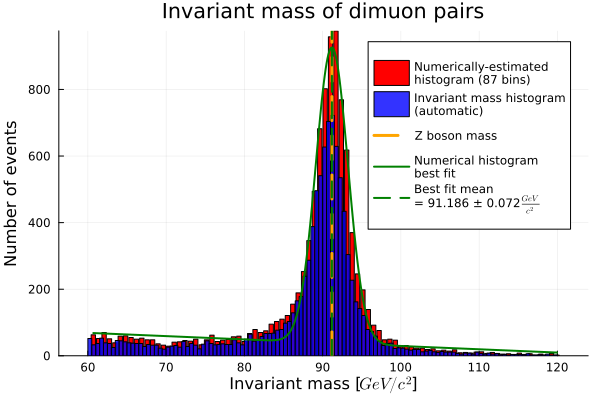

In [13]:
plt1 = plot(bar(xdata, ydata, label="Numerically-estimated\nhistogram (87 bins)", color=:red))
plt1 = plot!(histogram!(m, xlabel="Invariant mass "*"[\$ GeV/c^2 \$]", ylabel="Number of events", label="Invariant mass histogram\n(automatic)", legend=:topright, title="Invariant mass of dimuon pairs", color=:blue, fillalpha=0.8))
xlimits = xlims(plt1)
plt1 = vline!([91.1876], label="Z boson mass", color=:orange, linestyle=:dash, lw=3.0)
plt1 = plot!(LinRange(xdata[1], xdata[end], 500), bestfit.(LinRange(xdata[1], xdata[end], 500)), label="Numerical histogram\nbest fit", color=:green, lw=2.0)
plt1 = vline!([M], label="Best fit mean\n= $M"*L"\dfrac{GeV}{c^2}", color=:green, linestyle=:dash, lw=2.0)
plt1 = xlims!(xlimits)

display(plt1)